In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [27]:
X= np.array([[15,10],[15.9,20],[17,35],[17.5,40],[17.9,50],[18,18],[18.9,15.9],[19.9,11],[19.9,40],[19.9,23],[23,12],[23.9,34],[23.9,36],[24.9,14.5],[24.9,40]])
y = np.array([0.73,1.39,2.03,1.45,1.82,1.32,0.83,0.53,1.95,1.27,0.49,1.03,1.24,0.55,1.3])

In [28]:
df2 = pd.DataFrame(X, columns=["Price", "AdSpends"])
df2["Sales"] = pd.Series(y)
df2.head()

,Price,AdSpends,Sales
0,15.0,10.0,0.73
1,15.9,20.0,1.39
2,17.0,35.0,2.03
3,17.5,40.0,1.45
4,17.9,50.0,1.82


<AxesSubplot:>

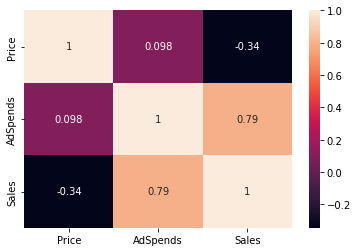

In [29]:
import seaborn as sns

sns.heatmap(df2.corr(), annot=True)

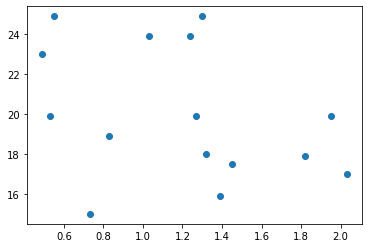

In [30]:
plt.scatter(df2.Sales, df2.Price)

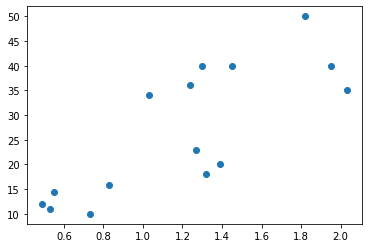

In [31]:
plt.scatter(df2.Sales ,df2.AdSpends)

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
print("Coefficient", lin_reg.coef_)
print("Intercept", lin_reg.intercept_)
print(X)
print(y)
y_pred

# y = 1.6385 - 0.0644x1 + 0.03182x2

Coefficient [-0.06440992  0.03181545]
Intercept 1.6385393028849773
[[15.  10. ]
 [15.9 20. ]
 [17.  35. ]
 [17.5 40. ]
 [17.9 50. ]
 [18.  18. ]
 [18.9 15.9]
 [19.9 11. ]
 [19.9 40. ]
 [19.9 23. ]
 [23.  12. ]
 [23.9 34. ]
 [23.9 36. ]
 [24.9 14.5]
 [24.9 40. ]]
[0.73 1.39 2.03 1.45 1.82 1.32 0.83 0.53 1.95 1.27 0.49 1.03 1.24 0.55
 1.3 ]


array([0.99054504, 1.25073061, 1.65711145, 1.78398374, 2.07637427,
       1.05183888, 0.92705751, 0.70675189, 1.62939994, 1.08853729,
       0.5388966 , 1.18086757, 1.24449847, 0.49605638, 1.30735035])

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
r2

0.8072055547315968

In [34]:
x_surf, y_surf = np.meshgrid(
    np.linspace(df2.Price.min(), df2.Price.max(), 100), 
    np.linspace(df2.AdSpends.min(), df2.AdSpends.max(), 100)
)
onlyX = pd.DataFrame({"Price": x_surf.ravel(), "AdSpends": y_surf.ravel()})
# onlyX = pd.DataFrame([[x_surf.ravel(), y_surf.ravel()]])
fittedY = lin_reg.predict(onlyX)

c:\Users\Naman Tamrakar\Desktop\ML-CCPD\.venv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


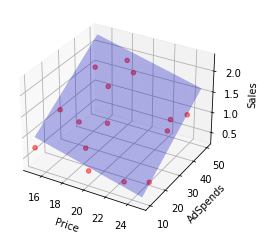

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df2['Price'],df2['AdSpends'],df2['Sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('AdSpends')
ax.set_zlabel('Sales')
plt.show()

# Testing my ML algorith

In [37]:
import numpy as np
from numpy import ndarray
from numpy.linalg import inv
from sklearn.metrics import r2_score

class LeastSqr:
    @property
    def coef_(self):
        return self.A[1:]

    @property
    def intercept_(self):
        return self.A[0]

    def score(self, X: ndarray, y: ndarray):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

    def predict(self, x: ndarray):
        x = np.column_stack((np.ones(x.shape[0]), x))

        return x @ self.A

    def fit(self, X: ndarray, y: ndarray):
        X = np.column_stack((np.ones(X.shape[0]), X))
        _, n = X.shape

        sx = np.zeros([n, n])
        for i in range(n):
            for j in range(n):
                sx[i, j] = (X[:, i]*X[:, j]).sum()

        sy = np.zeros(n)
        for i in range(n):
            sy[i] = (X[:, i] * y).sum()

        self.A = inv(sx) @ sy


lst = LeastSqr()
lst.fit(X, y)

lst.score(X, y)


0.8072055547315967